In [5]:
from sklearn import datasets
import matplotlib.pyplot as plt

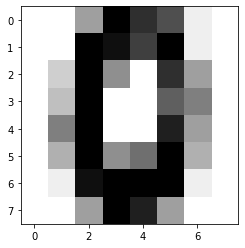

In [21]:
dgt=datasets.load_digits()
plt.figure(1,figsize=(6,4))
plt.imshow(dgt.images[-4],cmap=plt.cm.gray_r,interpolation="nearest")
plt.show()

/var/folders/pc/gs0lq1w52r16_wgx9vm4wxhm0000gn/T/ipykernel_64148/1532794041.py:27: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax_ = Axes3D(myfig, elev=-150, azim=110) #bu degerleri değiştirince 3d şekil kayıyor.


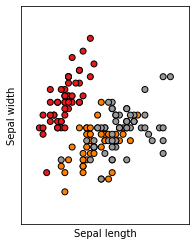

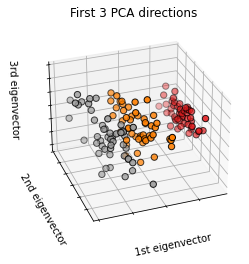

In [15]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

#datayı import ettik
iris_ds = datasets.load_iris()
X = iris_ds.data[:, :2]  
y = iris_ds.target

x_minimum, x_maximum = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_minimum, y_maximum = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

plt.figure(2, figsize=(3, 4))
plt.clf()


plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1, edgecolor="k")#cmap:Bir Renk Haritası örneği veya kayıtlı renk haritası adı
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")

plt.xlim(x_minimum, x_maximum)
plt.ylim(y_minimum, y_maximum)
plt.xticks(())
plt.yticks(())

#three PCA dimensions
myfig = plt.figure(1, figsize=(3, 4))
ax_ = Axes3D(myfig, elev=-150, azim=110) #bu degerleri değiştirince 3d şekil kayıyor.
reduced_x = PCA(n_components=3).fit_transform(iris_ds.data)#3 bileşen olacağını ve bunların iris datasından olacağını belirttik.
ax_.scatter(
    reduced_x[:, 0],
    reduced_x[:, 1],
    reduced_x[:, 2],
    c=y,
    cmap=plt.cm.Set1,
    edgecolor="k",
    s=40,)
ax_.set_title("First 3 PCA directions")
ax_.set_xlabel("1st eigenvector")
ax_.w_xaxis.set_ticklabels([])
ax_.set_ylabel("2nd eigenvector")
ax_.w_yaxis.set_ticklabels([])
ax_.set_zlabel("3rd eigenvector")
ax_.w_zaxis.set_ticklabels([])

plt.show()

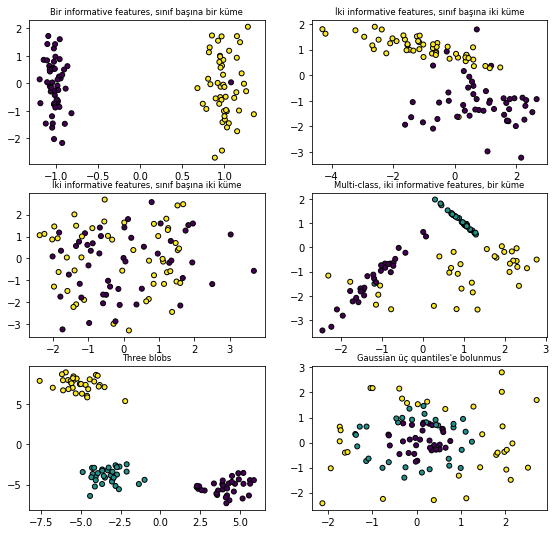

In [17]:
from sklearn.datasets import make_classification
from sklearn.datasets import make_blobs
from sklearn.datasets import make_gaussian_quantiles

plt.figure(figsize=(8, 8))
plt.subplots_adjust(bottom=0.050, top=0.9, left=0.05, right=0.95)

plt.subplot(321)
plt.title("Bir informative features, sınıf başına bir küme", fontsize="small")
x, y = make_classification(
    n_features=2, n_redundant=0, n_informative=1, n_clusters_per_class=1 #n_features=özellik sayısı, n_redundant=The number of redundant features
    
)
plt.scatter(x[:, 0], x[:, 1], marker="o", c=y, s=25, edgecolor="k")

plt.subplot(322)
plt.title("İki informative features, sınıf başına iki küme", fontsize="small")
x, y = make_classification(
    n_features=2, n_redundant=0, n_informative=2, n_clusters_per_class=1
)
plt.scatter(x[:, 0], x[:, 1], marker="o", c=y, s=25, edgecolor="k")

plt.subplot(323)
plt.title("İki informative features, sınıf başına iki küme", fontsize="small")
x1, y1 = make_classification(n_features=2, n_redundant=0, n_informative=2)
plt.scatter(x1[:, 0], X2[:, 1], marker="o", c=y1, s=25, edgecolor="k")

plt.subplot(324)
plt.title("Multi-class, iki informative features, bir küme", fontsize="small")
x, y = make_classification(
    n_features=2, n_redundant=0, n_informative=2, n_clusters_per_class=1, n_classes=3
)
plt.scatter(x[:, 0], x[:, 1], marker="o", c=y, s=25, edgecolor="k")

plt.subplot(325)
plt.title("Three blobs", fontsize="small")
x, y = make_blobs(n_features=2, centers=3)
plt.scatter(x[:, 0], x[:, 1], marker="o", c=y, s=25, edgecolor="k")

plt.subplot(326)
plt.title("Gaussian üç quantiles'e bolunmus", fontsize="small")
x, y = make_gaussian_quantiles(n_features=2, n_classes=3)
plt.scatter(x[:, 0], x[:, 1], marker="o", c=y, s=25, edgecolor="k")

plt.show()


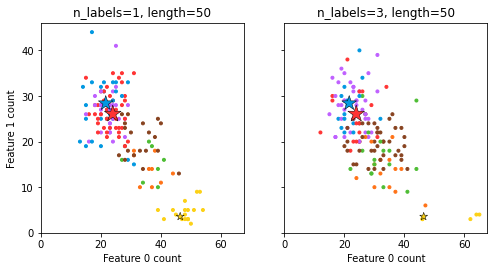

The data was generated from (random_state=371):
Class	P(C)	P(w0|C)	P(w1|C)
red	0.44	0.48	0.52
blue	0.37	0.43	0.57
yellow	0.19	0.93	0.07


In [20]:
from sklearn.datasets import make_multilabel_classification as make_ml_clf
import numpy as np
my_colors = np.array(
    [
        "!",
        "#FF3333",  # red
        "#0198E1",  # blue
        "#BF5FFF",  # purple
        "#FCD116",  # yellow
        "#FF7216",  # orange
        "#4DBD33",  # green
        "#87421F",  # brown
    ]
)


rnd_seed = np.random.randint(2 ** 10)


def plot_2d(ax, n_labels=1, n_classes=3, length=50):
    x, y, pc, pwc = make_ml_clf(
        n_samples=150,
        n_features=2,
        n_classes=n_classes,
        n_labels=n_labels,
        length=length,
        allow_unlabeled=False,
        return_distributions=True,
        random_state=rnd_seed,
    )

    ax.scatter(
        x[:, 0], x[:, 1], color=my_colors.take((y * [1, 2, 4]).sum(axis=1)), marker="."
    )
    ax.scatter(
        pwc[0] * length,
        pwc[1] * length,
        marker="*",
        linewidth=0.5,
        edgecolor="black",
        s=20 + 1500 * p_c ** 2,
        color=my_colors.take([1, 2, 4]),
    )
    ax.set_xlabel("Feature 0 count")
    return pc, pwc


_, (ax1, ax2) = plt.subplots(1, 2, sharex="row", sharey="row", figsize=(8, 4))
plt.subplots_adjust(bottom=0.15)

pc, pwc = plot_2d(ax1, n_labels=1)
ax1.set_title("n_labels=1, length=50")
ax1.set_ylabel("Feature 1 count")

plot_2d(ax2, n_labels=3)
ax2.set_title("n_labels=3, length=50")
ax2.set_xlim(left=0, auto=True)
ax2.set_ylim(bottom=0, auto=True)

plt.show()

print("The data was generated from (random_state=%d):" % rnd_seed)
print("Class", "P(C)", "P(w0|C)", "P(w1|C)", sep="\t")
for k, p, pw in zip(["red", "blue", "yellow"], pc, pwc.T):
    print("%s\t%0.2f\t%0.2f\t%0.2f" % (k, p, pw[0], pw[1]))